<a href="https://colab.research.google.com/github/almuhannaalhinai/IS-4487/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [9]:
# Import data from the AdviseInvest historical dataset
adviseinvest_df = pd.read_csv("https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/adviseinvest_historical_data.csv")

# Display the first few rows to verify
display(adviseinvest_df.head())

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [10]:
#View the datatypes
adviseinvest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


In [11]:
#Describe the data
display(adviseinvest_df.describe())

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


# Step 2: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

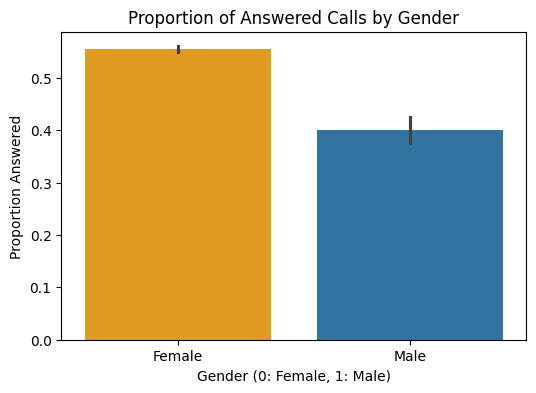

In [23]:
# Chart 1: Relationship between 'Answered' and 'female' (Proportion)
plt.figure(figsize=(6, 4))

# Replace 'M' with '1' in the 'female' column to consolidate male values
adviseinvest_df['female'] = adviseinvest_df['female'].replace('M', '1')

# Ensure the 'female' column is of integer type after replacement
adviseinvest_df['female'] = adviseinvest_df['female'].astype(int)

# Define a palette that maps the 'female' values (0 and 1) to specific colors (Female: orange, Male: blue)
gender_palette = {0: 'orange', 1: '#1f77b4'}

# Use hue and a dictionary palette as suggested by seaborn documentation for explicit mapping
sns.barplot(data=adviseinvest_df, x='female', y='answered', hue='female', palette=gender_palette, legend=False)

plt.title('Proportion of Answered Calls by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Proportion Answered')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

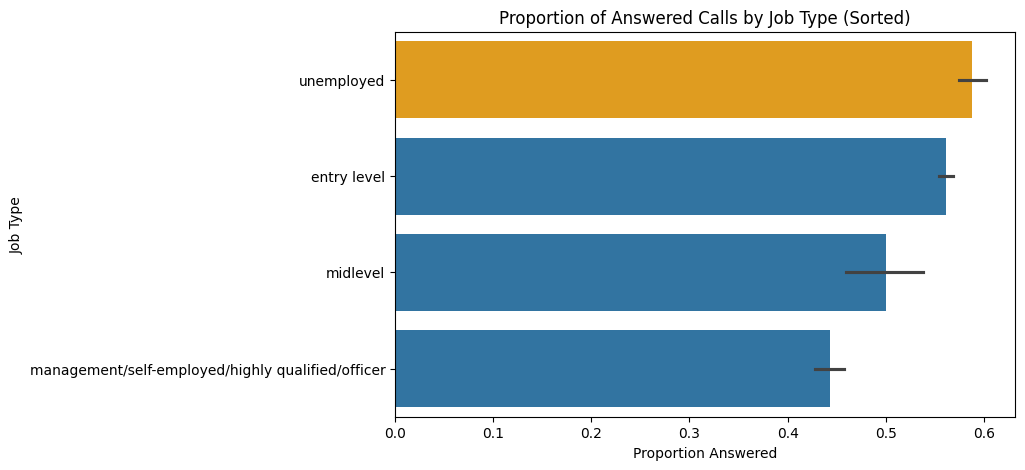

In [61]:
# Chart 2: Relationship between 'Answered' and 'job' (Proportion - Horizontal Bar Chart, Sorted and Highlighted)
plt.figure(figsize=(8, 5))

# Calculate the proportion of answered calls for each job type and sort
job_answered_proportion = adviseinvest_df.groupby('job')['answered'].mean().sort_values(ascending=False)

# Get the order of job types based on sorted proportion
job_order = job_answered_proportion.index

# Define colors: orange for unemployed (job type 0), blue for others
# Map job type values to colors based on the original job codes
job_colors = {0: '#1f77b4', 1: 'orange', 2: '#1f77b4', 3: '#1f77b4'}


# Use hue and a dictionary palette
sns.barplot(data=adviseinvest_df, y='job', x='answered', orient='h', order=job_order, palette=job_colors, hue='job', legend=False)

plt.title('Proportion of Answered Calls by Job Type (Sorted)')
plt.xlabel('Proportion Answered')
plt.ylabel('Job Type')
plt.yticks(ticks=[0, 1, 2, 3], labels=['unemployed', 'entry level', 'midlevel', 'management/self-employed/highly qualified/officer'])
plt.show()

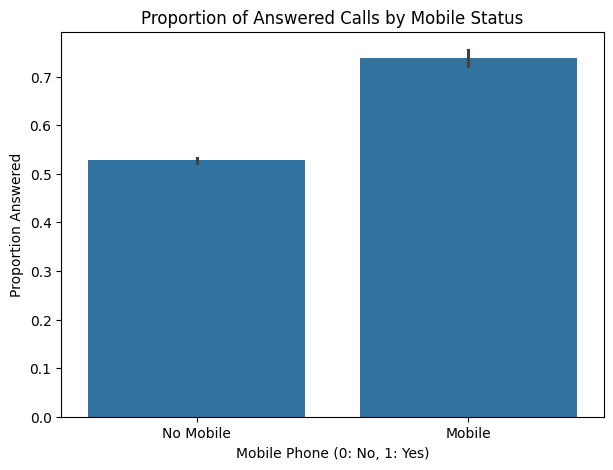

In [48]:
# Chart 3: Bar plot of Answered by Mobile status (Proportion)
plt.figure(figsize=(7, 5))
sns.barplot(data=adviseinvest_df, x='mobile', y='answered')
plt.title('Proportion of Answered Calls by Mobile Status')
plt.xlabel('Mobile Phone (0: No, 1: Yes)')
plt.ylabel('Proportion Answered')
plt.xticks(ticks=[0, 1], labels=['No Mobile', 'Mobile'])
plt.show()

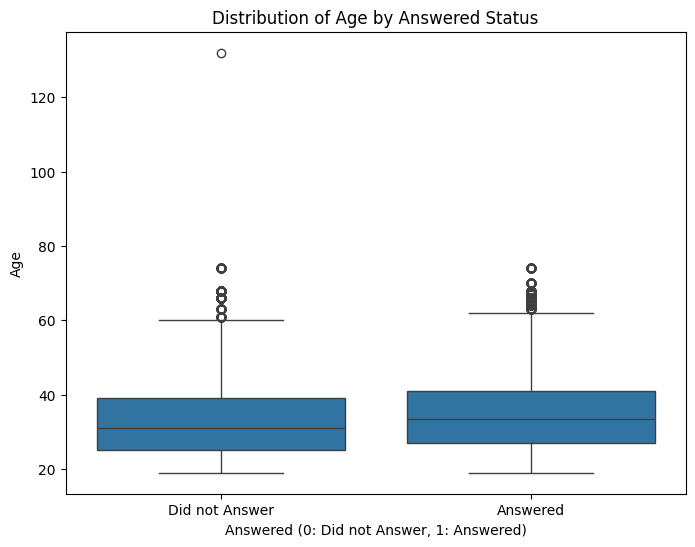

In [33]:
# Chart 4: Box plot of Age by Answered status
plt.figure(figsize=(8, 6))
sns.boxplot(data=adviseinvest_df, x='answered', y='age')
plt.title('Distribution of Age by Answered Status')
plt.xlabel('Answered (0: Did not Answer, 1: Answered)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Did not Answer', 'Answered'])
plt.show()

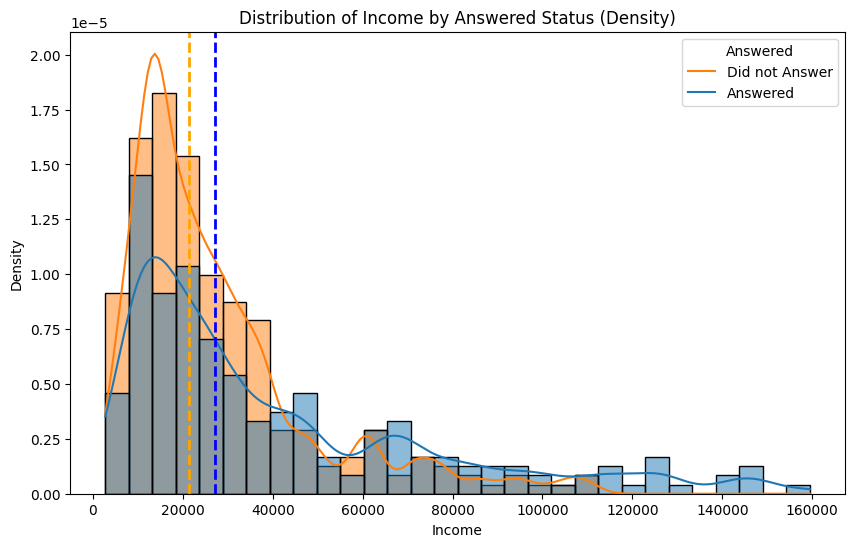

In [46]:
# Chart 5: Income histogram (by Answered) with filtering, median lines, fewer bins, and density on y-axis

# Filter out negative income entries
adviseinvest_df_filtered_income = adviseinvest_df[adviseinvest_df['income'] >= 0].copy()

plt.figure(figsize=(10, 6))

# Create histogram with fewer bins and KDE, showing density on y-axis
sns.histplot(data=adviseinvest_df_filtered_income, x='income', hue='answered', bins=30, kde=True, stat='density') # Change stat to 'density'

# Calculate medians for each group
median_income_answered = adviseinvest_df_filtered_income[adviseinvest_df_filtered_income['answered'] == 1]['income'].median()
median_income_not_answered = adviseinvest_df_filtered_income[adviseinvest_df_filtered_income['answered'] == 0]['income'].median()

# Add vertical lines for medians
plt.axvline(median_income_not_answered, color='blue', linestyle='dashed', linewidth=2, label=f'Median Income (Did not Answer): ${median_income_not_answered:,.0f}')
plt.axvline(median_income_answered, color='orange', linestyle='dashed', linewidth=2, label=f'Median Income (Answered): ${median_income_answered:,.0f}')


plt.title('Distribution of Income by Answered Status (Density)')
plt.xlabel('Income')
plt.ylabel('Density') # Update y-axis label
plt.legend(title='Answered', labels=['Did not Answer', 'Answered'])
plt.show()

# Step 3: Summarize Your Findings
### 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

The target variable in this case is Answered, which indicates whether a customer picked up a scheduled call. Most of the other variables in the dataset are useful and applicable to the business need because they may help explain or predict a customer’s likelihood of answering.

The strongest single predictor is Mobile, because customers who provided a mobile number are much more likely to answer the call compared to those who did not. Additionally, Income is relevant as different income groups may respond differently. Gender also matters, with women more likely to answer than men. Age has a weaker effect, but younger versus older groups could still differ. Job type is important, since unemployed or entry-level customers tend to answer more often than those in management roles.

Other demographic and lifestyle variables, such as number of dependents, rent versus own residence, and recent car purchase, have less effect on answering the call.

### 3.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

The dataset could be improved by fixing some quality issues and making the data types clearer. For example, there are negative income values and very high ages, such as 132 years, which are not realistic and should be cleaned. Some variables like gender, mobile, rent, or new car are coded as numbers but should really be treated as categories or yes/no values. Similarly, job type, checking account, and savings account should be stored as categories instead of plain numbers. Finally, the dataset could be made stronger by adding new features, such as the time of day calls were made or whether the customer had answered in the past

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [63]:
!jupyter nbconvert --to html "assignment_4_AlhinaiAlmuhanna.ipynb"

[NbConvertApp] Converting notebook assignment_4_AlhinaiAlmuhanna.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 527974 bytes to assignment_4_AlhinaiAlmuhanna.html
